#  Lab 9 : Decision Trees - ID3 Algorithm

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [104]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [105]:
df = pd.read_csv('data-set for decision tree.csv')
df.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
0,?,HS-grad,Widowed,?,Not-in-family,White,Female,United-States,<=50K
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
2,?,Some-college,Widowed,?,Unmarried,Black,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K


In [106]:
df.columns

Index(['workclass', 'education', 'marital.status', 'occupation',
       'relationship', 'race', 'sex', 'native.country', 'income'],
      dtype='object')

In [107]:
df.describe()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,9,16,7,15,6,5,2,42,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


# 1. Separating Numerical and Categorical Columns:

In [108]:
categorical_features = df.select_dtypes(include=['object'])
categorical_features.head(1)

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
0,?,HS-grad,Widowed,?,Not-in-family,White,Female,United-States,<=50K


In [109]:
categorical_features = list(categorical_features)
print(f'Categorical Features are : {categorical_features}')

Categorical Features are : ['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country', 'income']


In [110]:
numerical_features = df.select_dtypes(include=["int64", "float64"]).columns
print(f'numerical features are : {numerical_features}')

# There are no numerical features in our dataset.

numerical features are : Index([], dtype='object')


# 2. Handling NAN Values

In [111]:
# plt.figure(figsize=(10,6))
# sns.heatmap(df.isnull(), cmap='viridis', cbar=False)
# plt.title('Missing Values Heatmap')
# plt.show()

# From heat map its look like there are no null values iin the entire dataset.

In [112]:
df.isnull().sum()  # Count missing values per column

# There are no null values instead there is "?" that might affect the data

workclass         0
education         0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
native.country    0
income            0
dtype: int64

In [113]:
(df == '?').sum()

# In some rows  there are alot of "?" that can significantly affect our output so for that we'lll use forward fill

workclass         1836
education            0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
native.country     583
income               0
dtype: int64

In [114]:
# df.replace('?', np.nan, inplace=True)  # Convert '?' to NaN
# df.ffill(inplace=True)  # Forward fill missing values

In [115]:
# df.fillna(method='bfill', inplace=True)

# Also applying bfill to ensure no NAN values at top row

### Analysis:
- when ? is replaced accuracy score was 81
- without replcement accuracy is 82

# 3. Encoding


In [116]:
# label_encoder = LabelEncoder()

# for features in categorical_features:
#     df[features] = label_encoder.fit_transform(df[features])

In [117]:
# One hot encoding

df = pd.get_dummies(df, columns=df.columns.difference(['income']), drop_first=True)

# 4. Handling Outliers
    - As all the columns are numerical that is why there is no need to check for outliers

# 5. Scaling Data
    - Not required

#  6. Training and Testing

In [118]:
#  Split Data into Features (X) and Target (y) 

X = df.drop(columns=['income'])
y = df[['income']]

In [119]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [120]:
model = DecisionTreeClassifier(criterion='entropy')  

In [121]:
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [122]:
y_pred = model.predict(X_test)

In [123]:
accuracy = accuracy_score(y_test, y_pred)

In [124]:
accuracy

0.8206663595885153

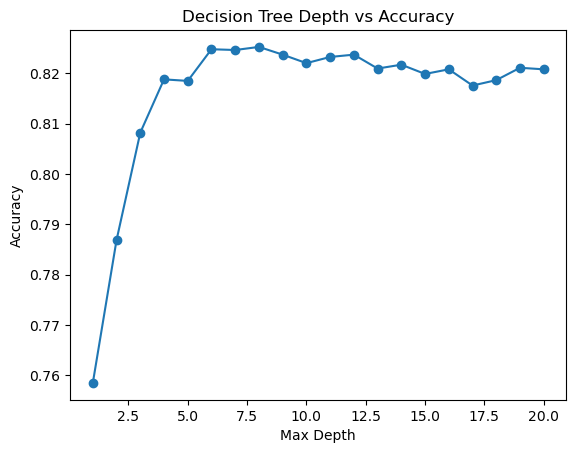

In [126]:
# Plot accuracy for different depths
depths = range(1, 21)
scores = [DecisionTreeClassifier(criterion='entropy', max_depth=d).fit(X_train, y_train).score(X_test, y_test) for d in depths]

plt.plot(depths, scores, marker='o')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.title('Decision Tree Depth vs Accuracy')
plt.show()